In [4]:

import MetaTrader5 as mt5
import pandas as pd
import datetime
import mplfinance as mpf
import pandas_ta as pta
import numpy as np
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange
import os
import sys
import matplotlib.pyplot as plt 


current = os.path.abspath('')
parent = os.path.dirname(current)
sys.path.append(parent)

from trade_utils import create_opening_trade, get_symbol_data


if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [14]:

data = get_symbol_data("ETHUSD", periods=500)

rsi_overbought_threshold = 60
rsi_oversold_threshold = 40

#data = data.assign(rsi_1 = data.ind_rsi.shift(-1) )

previous_cdl = data.shift(-1)
data["ptn_bullish_engulfing_1"] = np.where(
        (data.open <= previous_cdl.close) &
        (data.close >= previous_cdl.open) &
        (data.cdl_up & previous_cdl.cdl_down),
        True, False
    )

data["ptn_bearish_engulfing_1"] = np.where(
        (data.open >= previous_cdl.close) &
        (data.close <= previous_cdl.open) &
        (data.cdl_down & previous_cdl.cdl_up), 
        True, False
    )
    

data["is_down_trend"] = np.where( 
                            (data.ind_rsi.shift(-1) < rsi_oversold_threshold) | 
                            (data.ind_rsi.shift(-2) < rsi_oversold_threshold) |
                            (data.ind_rsi.shift(-3) < rsi_oversold_threshold),
                        True, False)



data["is_up_trend"] = np.where( 
                            (data.ind_rsi.shift(-1) > rsi_overbought_threshold) | 
                            (data.ind_rsi.shift(-2) > rsi_overbought_threshold) |
                            (data.ind_rsi.shift(-3) > rsi_overbought_threshold),
                        True, False)

data["buy_signal"] = np.where(
    (data.ptn_bullish_engulfing_1 | data.ptn_eveningstar ) & 
    (data.ind_rsi > rsi_oversold_threshold) & 
    (data.is_down_trend),
    True, False
    )

data["sell_signal"] = np.where(
    (data.ptn_bearish_engulfing_1 | data.ptn_eveningstar) & 
    (data.ind_rsi < rsi_overbought_threshold) & 
    (data.is_up_trend),
    True, False
    )

result = data.query("buy_signal")[["buy_signal", "sell_signal"]]




In [21]:
data = get_symbol_data("ETHUSD", periods=500)

data['bullish'] = 0.0
data['bullish'] = np.where(data["ind_sma9"] > data["ind_sma21"], 1.0, 0.0)

# crossover up = 1, down = -1
data['crossover'] = data['bullish'].diff()

data.query("crossover == 0")

,open,high,low,close,tick_volume,spread,real_volume,server_time,local_time,cdl_size,...,ind_sma9,ind_sma21,ptn_bullish_engulfing,ptn_bearish_engulfing,ptn_morningstar,ptn_eveningstar,ptn_bullish_engulfing_1,ptn_bearish_engulfing_1,bullish,crossover
time,,,,,,,,,,,,,,,,,,,,,
2024-01-04 08:45:00,2234.51,2239.05,2232.72,2238.55,530,146,0,2024-01-04 15:45:00,2024-01-04 08:45:00,6.33,...,2234.914444,2234.736190,False,False,False,False,False,False,1.0,0.0
2024-01-04 08:40:00,2234.35,2235.19,2232.87,2234.51,538,146,0,2024-01-04 15:40:00,2024-01-04 08:40:00,2.32,...,2234.404444,2234.136667,False,False,False,False,False,False,1.0,0.0
2024-01-04 08:35:00,2233.69,2235.45,2232.85,2234.35,610,146,0,2024-01-04 15:35:00,2024-01-04 08:35:00,2.60,...,2234.576667,2233.845714,False,False,False,False,False,False,1.0,0.0
2024-01-04 08:30:00,2235.97,2236.25,2231.39,2233.69,801,146,0,2024-01-04 15:30:00,2024-01-04 08:30:00,4.86,...,2234.893333,2233.586190,False,False,False,False,False,False,1.0,0.0
2024-01-04 08:25:00,2234.61,2237.41,2234.56,2236.16,646,146,0,2024-01-04 15:25:00,2024-01-04 08:25:00,2.85,...,2235.247778,2233.235714,False,False,False,False,True,False,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-02 15:30:00,2370.80,2370.91,2366.38,2367.04,644,146,0,2024-01-02 22:30:00,2024-01-02 15:30:00,4.53,...,NaN,NaN,False,False,False,False,False,False,0.0,0.0
2024-01-02 15:25:00,2373.66,2374.61,2369.55,2370.91,586,146,0,2024-01-02 22:25:00,2024-01-02 15:25:00,5.06,...,NaN,NaN,False,False,False,False,False,False,0.0,0.0
2024-01-02 15:20:00,2378.35,2378.43,2371.69,2373.66,669,146,0,2024-01-02 22:20:00,2024-01-02 15:20:00,6.74,...,NaN,NaN,False,False,False,False,False,True,0.0,0.0


In [17]:
#result
signals = data.query("sell_signal")
signals

,open,high,low,close,tick_volume,spread,real_volume,server_time,local_time,cdl_size,...,ptn_bullish_engulfing,ptn_bearish_engulfing,ptn_morningstar,ptn_eveningstar,ptn_bullish_engulfing_1,ptn_bearish_engulfing_1,is_down_trend,is_up_trend,buy_signal,sell_signal
time,,,,,,,,,,,,,,,,,,,,,
2024-01-03 15:40:00,2222.21,2223.53,2214.05,2215.58,778,146,0,2024-01-03 22:40:00,2024-01-03 15:40:00,9.48,...,False,False,False,False,False,True,False,True,False,True
2024-01-03 11:05:00,2242.91,2244.63,2230.47,2231.01,1870,146,0,2024-01-03 18:05:00,2024-01-03 11:05:00,14.16,...,False,False,False,False,False,True,False,True,False,True
2024-01-03 04:55:00,2378.44,2378.44,2375.27,2377.43,451,146,0,2024-01-03 11:55:00,2024-01-03 04:55:00,3.17,...,False,False,False,False,False,True,False,True,False,True
2024-01-03 01:40:00,2380.09,2380.09,2378.06,2378.95,523,146,0,2024-01-03 08:40:00,2024-01-03 01:40:00,2.03,...,False,False,False,False,False,True,False,True,False,True
2024-01-03 01:30:00,2381.34,2381.34,2378.17,2379.03,380,146,0,2024-01-03 08:30:00,2024-01-03 01:30:00,3.17,...,False,False,False,False,False,True,False,True,False,True
2024-01-03 01:05:00,2378.48,2379.48,2375.98,2376.45,596,146,0,2024-01-03 08:05:00,2024-01-03 01:05:00,3.50,...,False,False,False,False,False,True,False,True,False,True
2024-01-02 21:35:00,2377.81,2377.96,2372.78,2372.95,441,146,0,2024-01-03 04:35:00,2024-01-02 21:35:00,5.18,...,False,False,False,False,False,True,False,True,False,True
2024-01-02 15:20:00,2378.35,2378.43,2371.69,2373.66,669,146,0,2024-01-02 22:20:00,2024-01-02 15:20:00,6.74,...,False,False,False,False,False,True,False,True,False,True
2024-01-02 04:35:00,2425.07,2425.07,2418.55,2419.50,733,146,0,2024-01-02 11:35:00,2024-01-02 04:35:00,6.52,...,False,False,False,False,False,True,False,True,False,True


2024-01-03 15:40:00


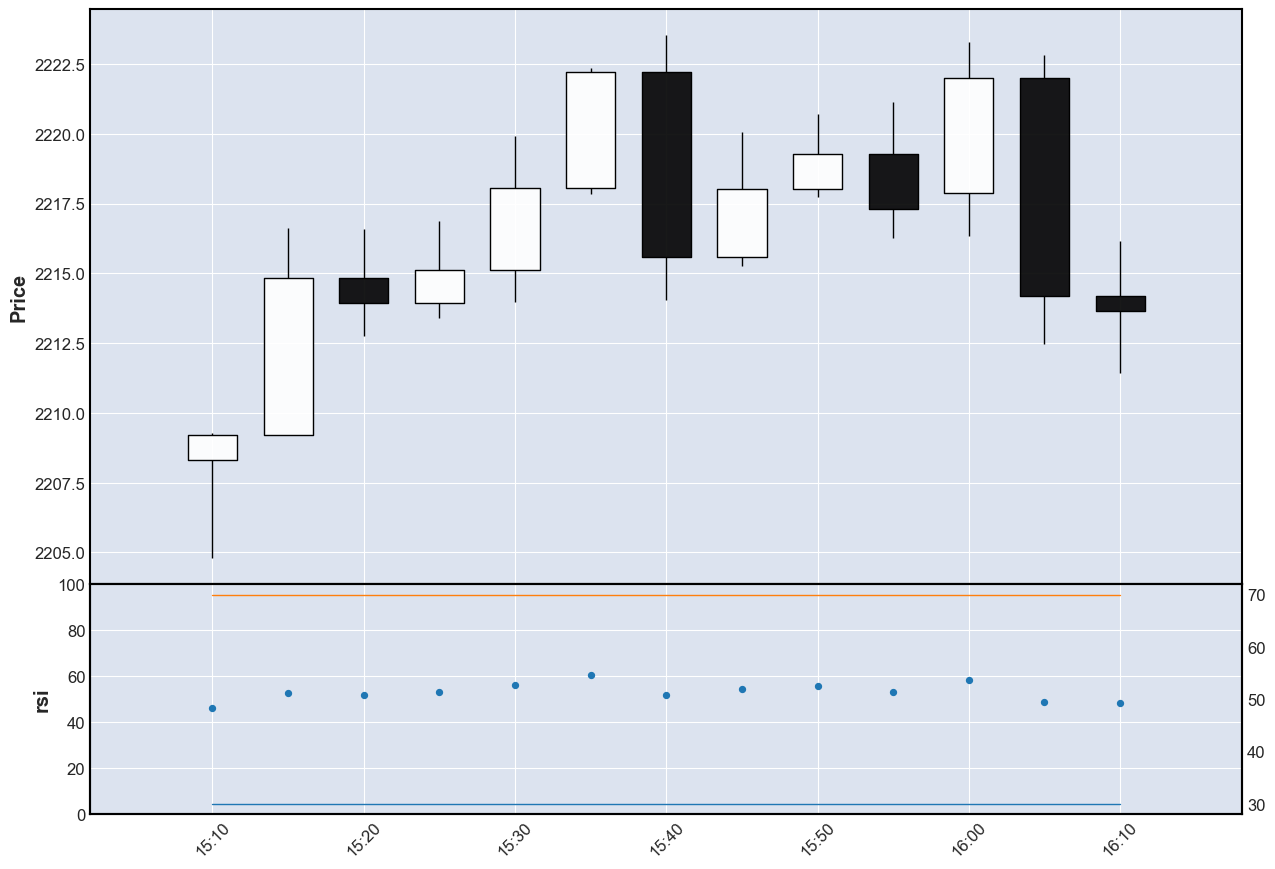

2024-01-03 11:05:00


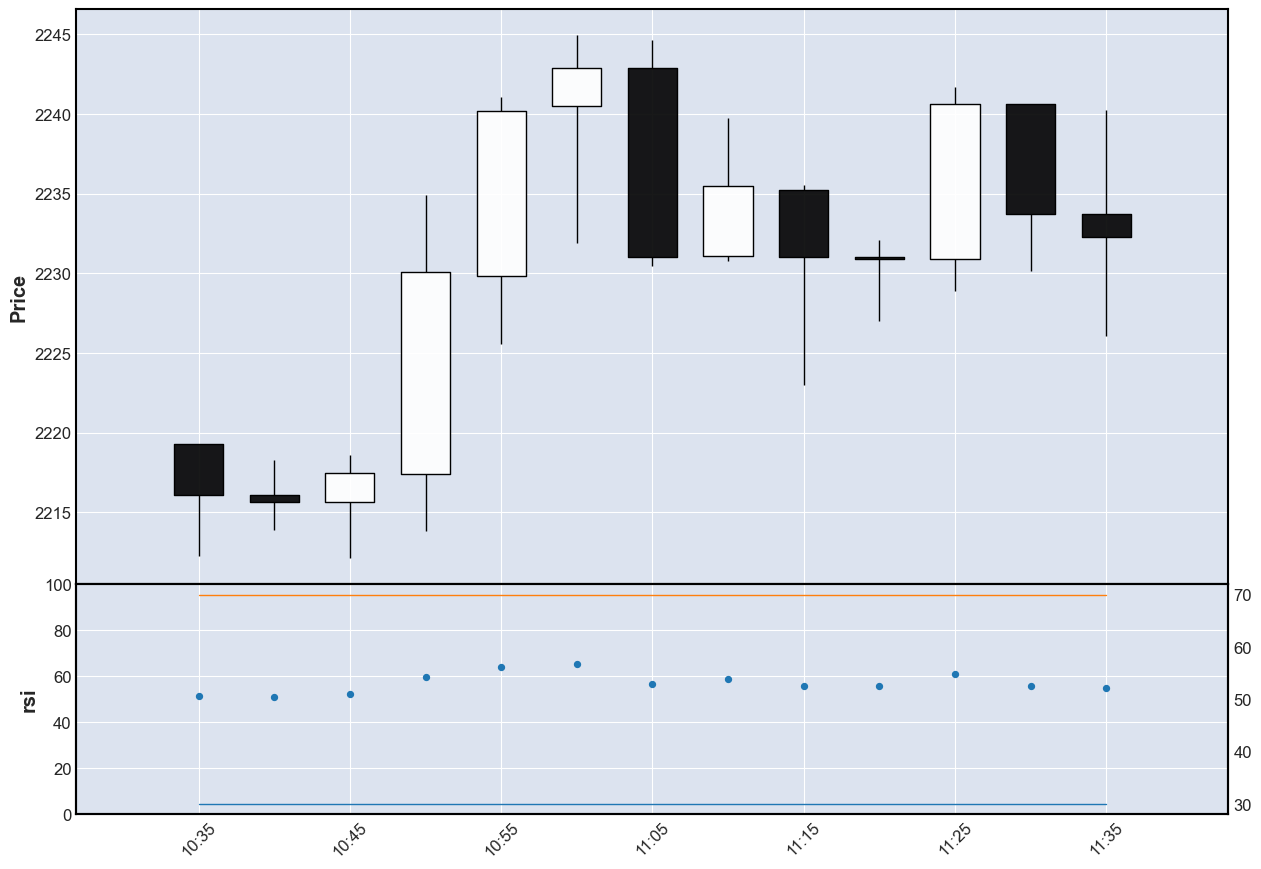

2024-01-03 04:55:00


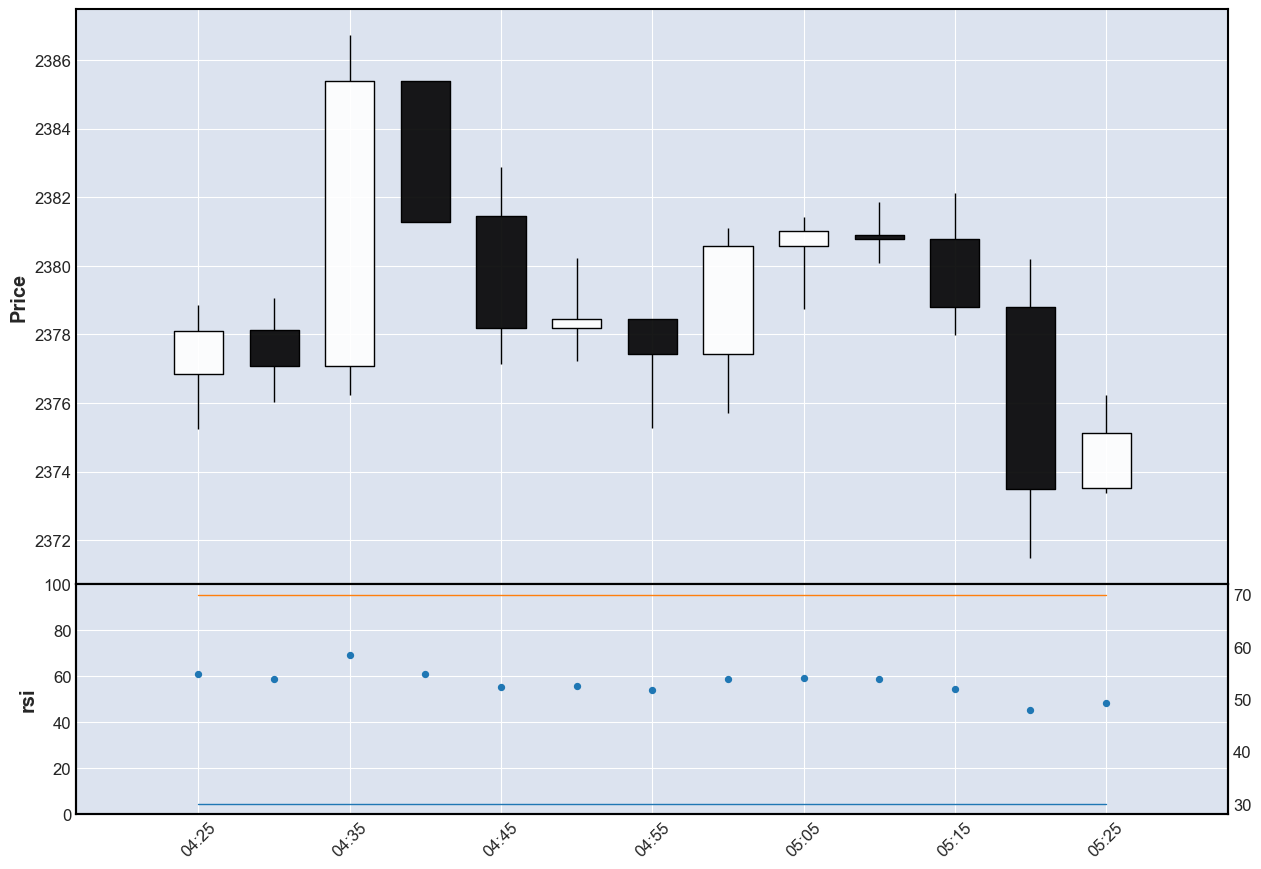

2024-01-03 01:40:00


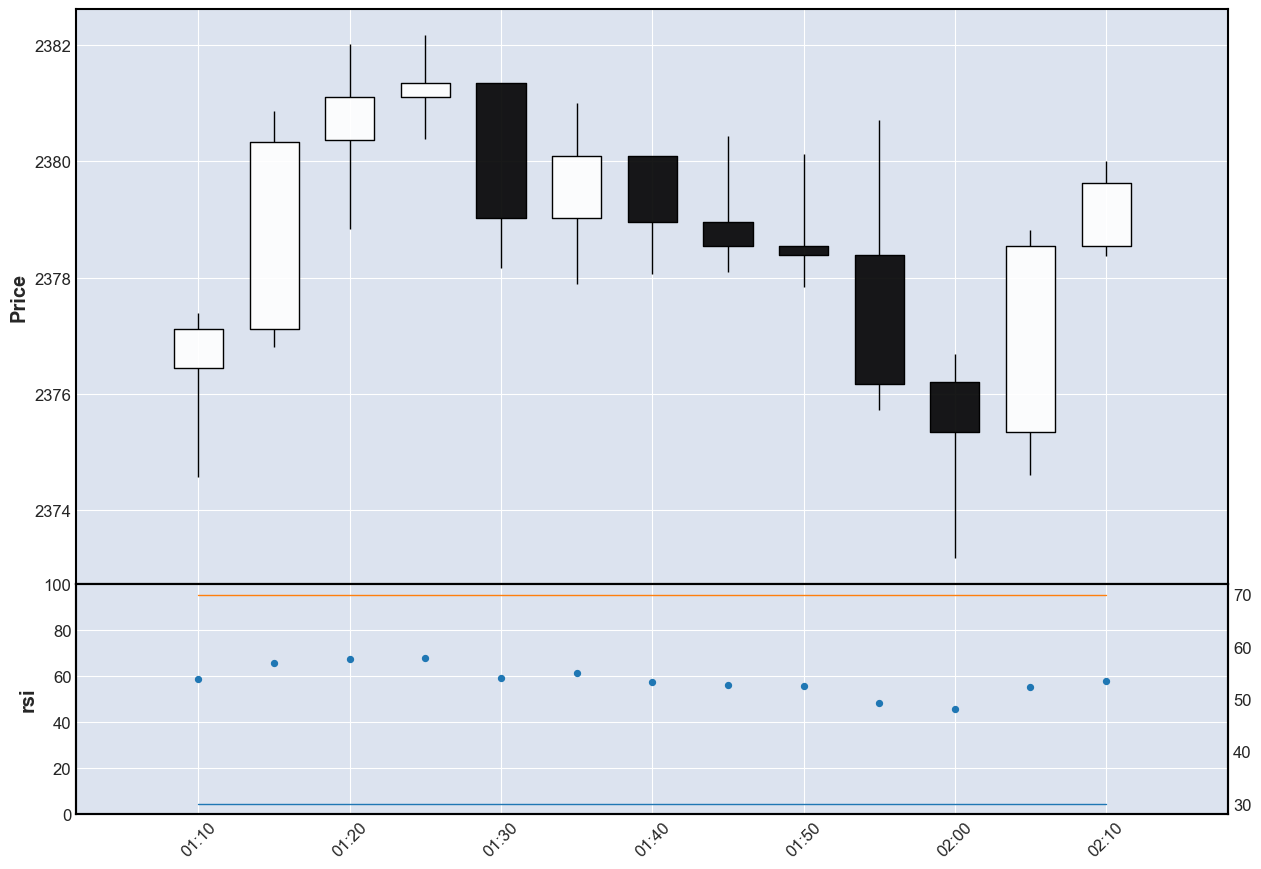

2024-01-03 01:30:00


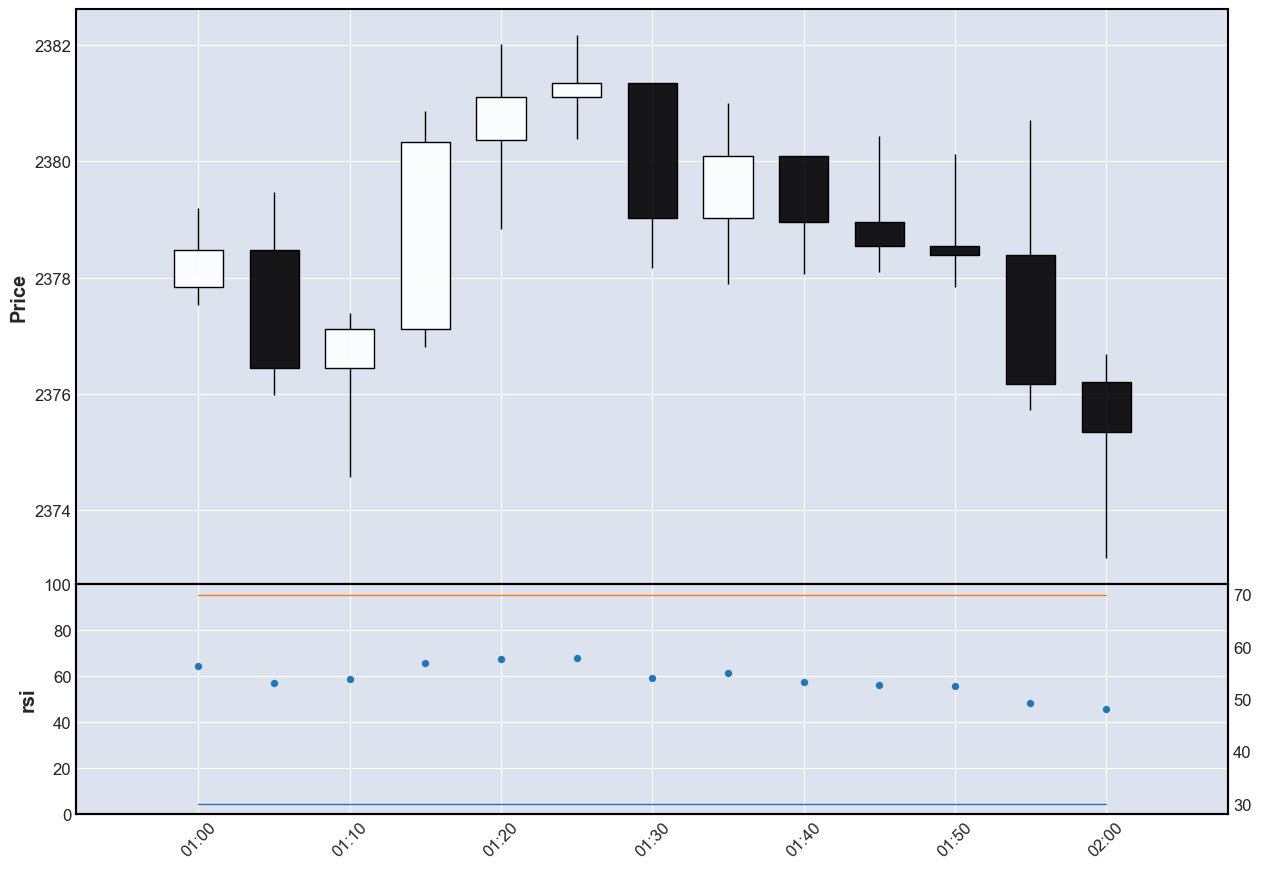

2024-01-03 01:05:00


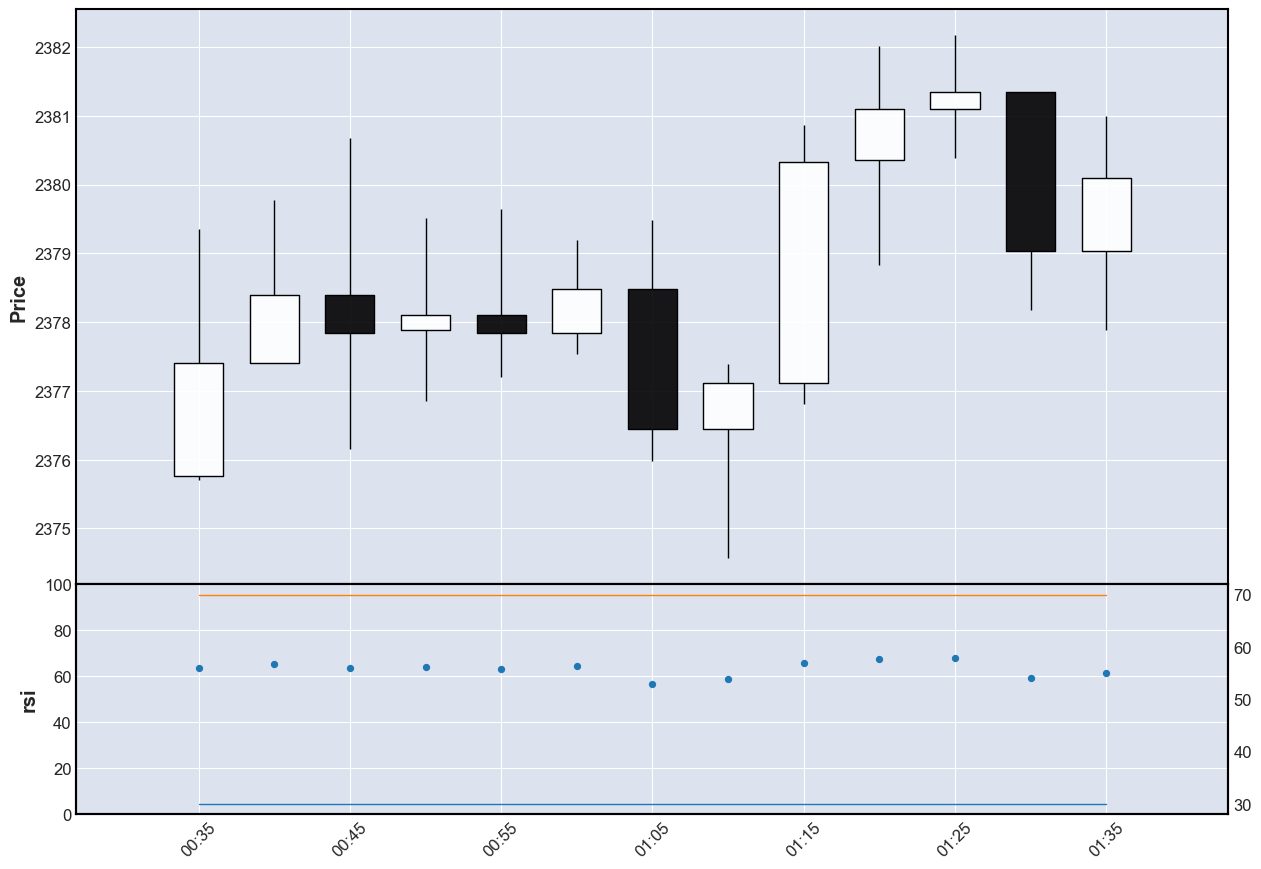

2024-01-02 21:35:00


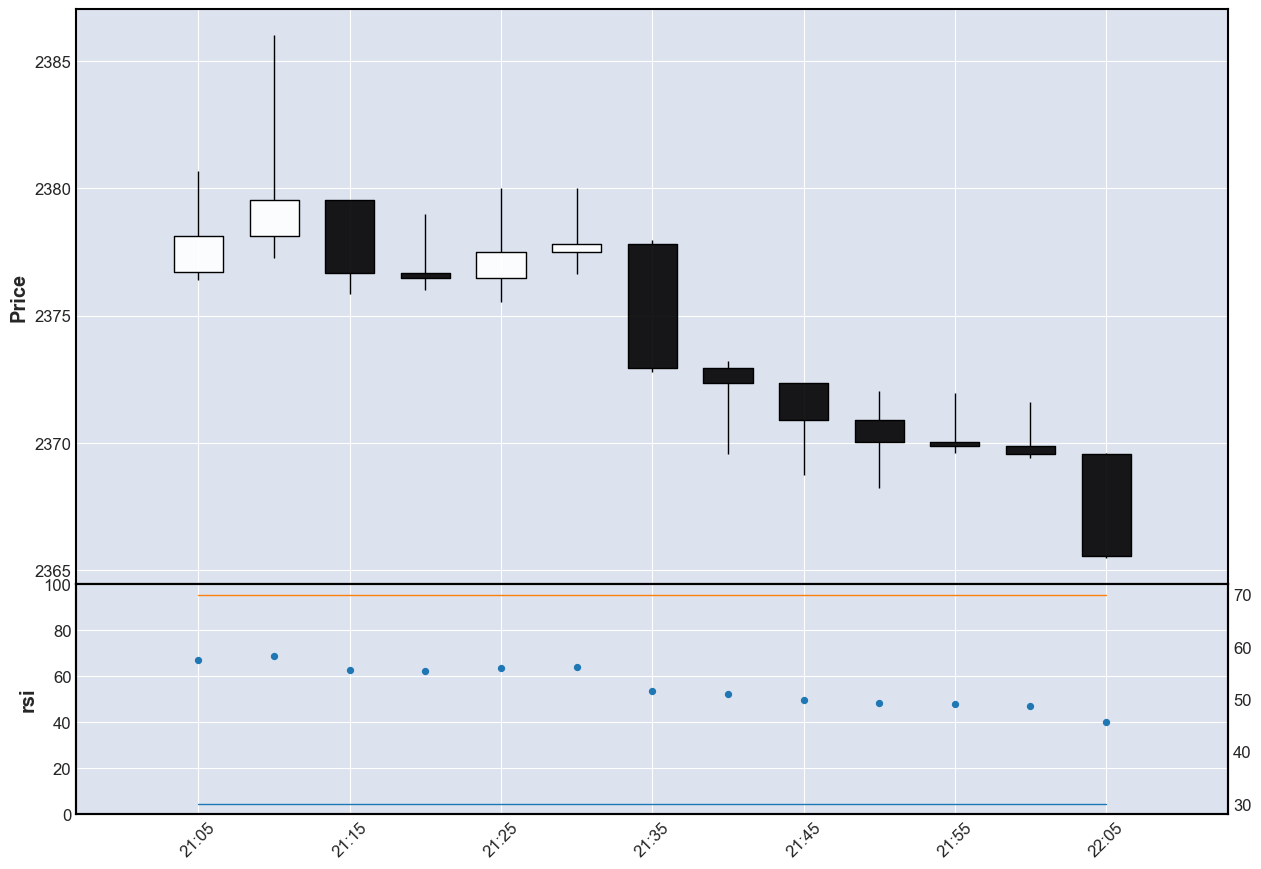

2024-01-02 15:20:00


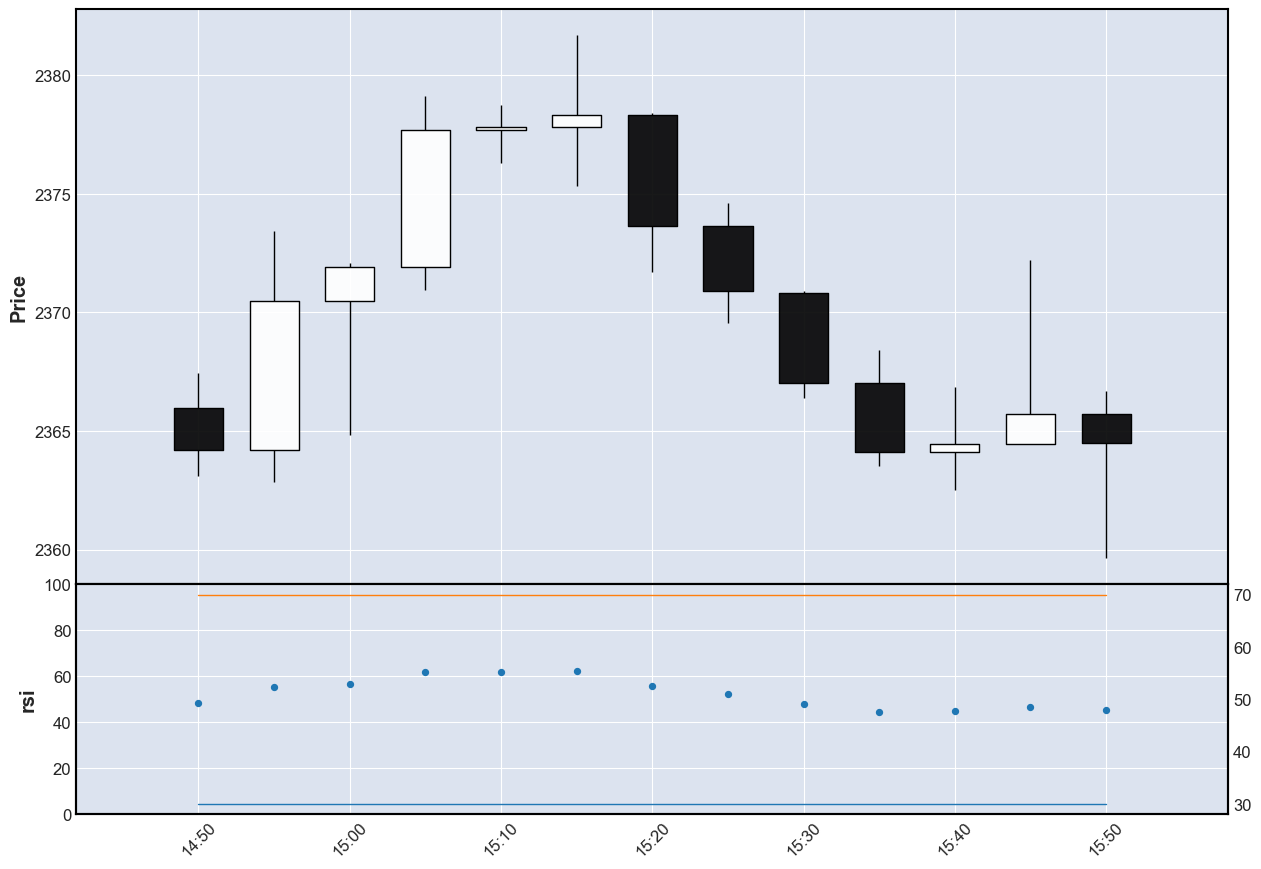

2024-01-02 04:35:00


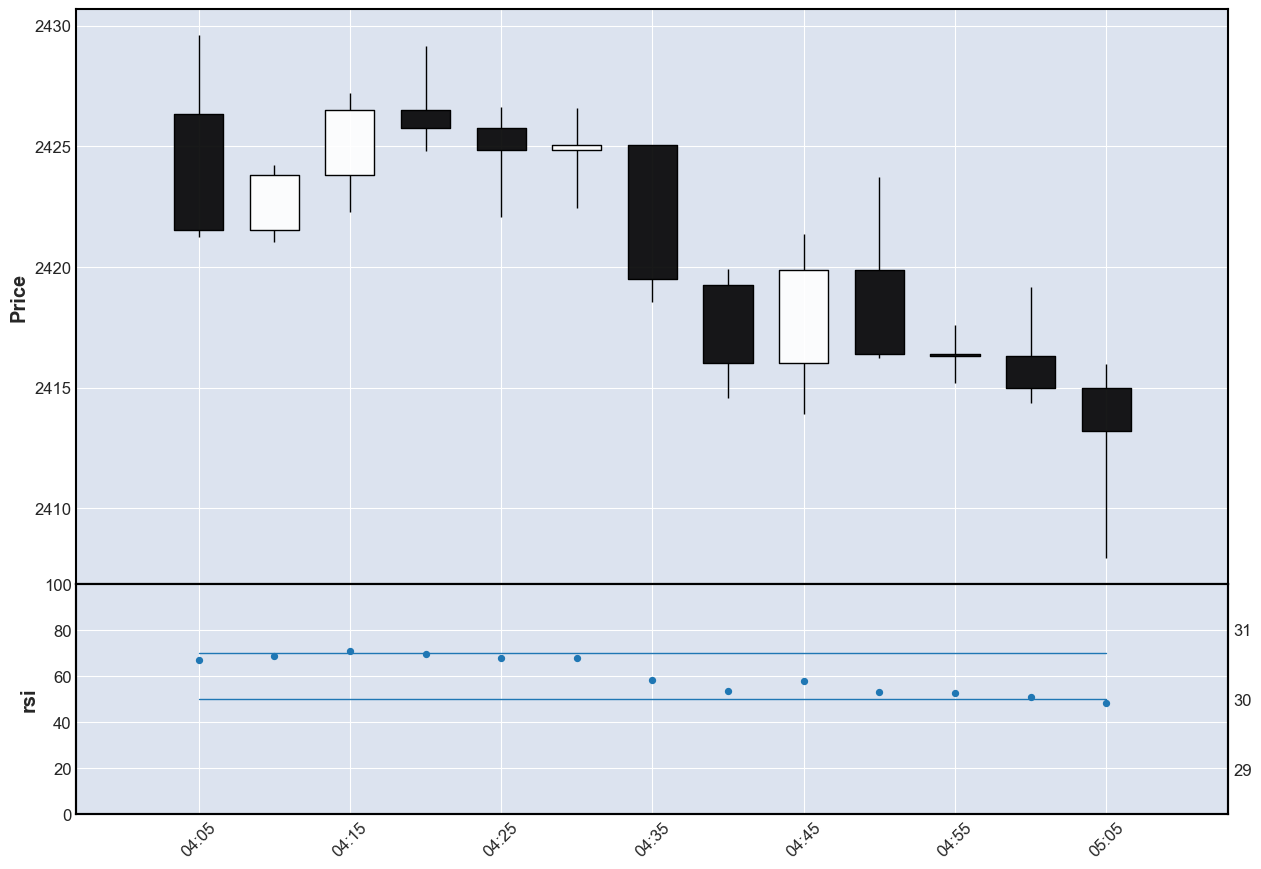

2024-01-02 03:05:00


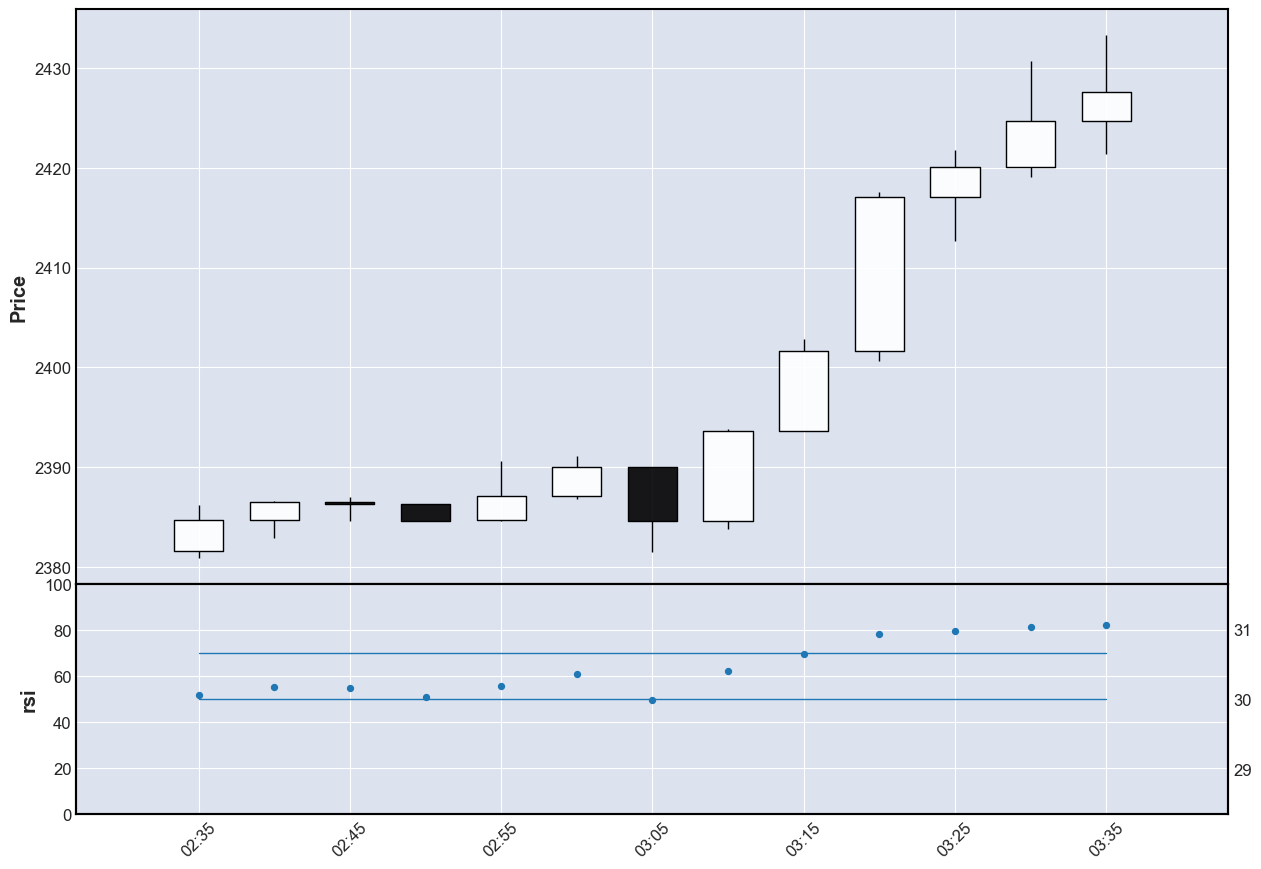

In [18]:
# print a chart for each trade signal
focus_data = 0
for index, row in signals.iterrows():
    # we want to show :30 before and after trade signal
    start_time = pd.to_datetime(index) - datetime.timedelta(minutes=30)
    end_time = pd.to_datetime(index) + datetime.timedelta(minutes=30)
    print(index)

    focus_data = (
        data
        .query("index >= @start_time and index <= @end_time")
        .sort_index(ascending=True)
    )

    line30 = np.full( len(focus_data), 30)
    line70 = np.full( len(focus_data), 70)
    
    rsi_plot  = [
        mpf.make_addplot(focus_data.ind_rsi, panel=1, ylim=[0,100], ylabel="rsi", type="scatter"),
        mpf.make_addplot(line30, panel=1, width=1),
        mpf.make_addplot(line70, panel=1, width=1),
        #mpf.make_addplot(focus_data.signal, type="scatter", marker="$buy$", markersize=800, color="g")
        
    ]
    mpf.plot(focus_data, type="candle", figscale=2.0, addplot=rsi_plot)

    

